## Setup

In [1]:
from MERFISH_Objects.execute_class import *
import shutil
import importlib
# importlib.reload(MERFISH_Objects.execute_class)
import time
from tqdm import trange
import pandas as pd
from collections import Counter
import numpy as np
from Bio import SeqIO


# from dredFISH.Utils.__init__plots import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

2022-08-22 12:29:32,141 [INFO] WRITING LOG OUTPUT TO /home/fangming/.cellpose/run.log


<ipython-input-1-add4a16e2e93>:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
pth = "/scratch/test_merfish_FX_results"

In [3]:
start = time.time()
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)
parameters = config.parameters
fishdata_path = os.path.join(metadata_path, parameters['fishdata'])
utilities_path = parameters['utilities_path']
bitmap = config.bitmap

In [4]:
for key in parameters:
    if key.endswith('path') or key.endswith('data'):
        print(key, parameters[key])

daemon_path /scratch/test_daemon_FX
utilities_path /scratch/test_merfish_FX
fishdata fishdata_testFX


In [5]:
posname = '7-Pos004_003'#image_metadata.posnames[0]

# Process Single Position

In [6]:
%%time
self = Dataset_Class(metadata_path, dataset, cword_config, verbose=True)
self.main()

12:29:32 Checking Imaging: 0it [00:00, ?it/s]
12:29:32 Checking Hot Pixel: 0it [00:00, ?it/s]
12:29:32 Checking Position Flags: 100%|██████████| 150/150 [00:00<00:00, 2298.45it/s]

CPU times: user 88.8 ms, sys: 35.4 ms, total: 124 ms
Wall time: 166 ms


### Registration

In [7]:
def pfunc(hybe):
    self = Registration_Class(metadata_path,dataset,posname,hybe,cword_config,verbose=False)
    self.find_beads()

In [8]:
# %%time
# # takes some time
# Input = [hybe for readout_probe,hybe,channel in bitmap if not hybe==parameters['ref_hybe']]
# pfunc(parameters['ref_hybe'])
# ncpu = 10
# pool = multiprocessing.Pool(ncpu)
# sys.stdout.flush()
# results = pool.imap(pfunc, Input)
# iterable = tqdm(results,total=len(Input),desc=str(datetime.now().strftime("%H:%M:%S"))+' '+dataset,position=0)
# for i in iterable:
#     pass
# pool.close()
# sys.stdout.flush()

In [9]:
bitmap, len(bitmap), parameters['ref_hybe']

([('RS0095', 'hybe1', 'FarRed'),
  ('RS0109', 'hybe2', 'FarRed'),
  ('RS0175', 'hybe3', 'FarRed'),
  ('RS0237', 'hybe4', 'FarRed'),
  ('RS0307', 'hybe5', 'FarRed'),
  ('RS0332', 'hybe6', 'FarRed'),
  ('RS0384', 'hybe10', 'FarRed'),
  ('RS0406', 'hybe11', 'FarRed'),
  ('RS0451', 'hybe12', 'FarRed'),
  ('RS0468', 'hybe13', 'FarRed'),
  ('RS0548', 'hybe14', 'FarRed'),
  ('RS64.0', 'hybe15', 'FarRed'),
  ('RS156.0', 'hybe19', 'FarRed'),
  ('RS278.0', 'hybe20', 'FarRed'),
  ('RS313.0', 'hybe21', 'FarRed'),
  ('RS643.0', 'hybe22', 'FarRed'),
  ('RS740.0', 'hybe23', 'FarRed'),
  ('RS810.0', 'hybe24', 'FarRed')],
 18,
 'hybe1')

##### Visual Check

In [10]:
# results
all_beads = {}
all_tforms = {}
all_regbeads = {}
for i, (readout_probe, hybe, channel) in enumerate(bitmap):
    self = Registration_Class(metadata_path, dataset, posname, hybe, cword_config, verbose=False)
    self.check_beads()
    self.check_tforms()
    beads = self.beads # y, x, z?
    tforms = np.array([self.tforms['y'], self.tforms['x'], self.tforms['z']]) # y, x, z
    regbeads = beads + tforms
    
    all_beads[i] = beads
    all_tforms[i] = tforms
    all_regbeads[i] = regbeads
    print(i, beads.shape, regbeads.shape, tforms, )
    

0 (139, 3) (139, 3) [0 0 0]
1 (152, 3) (152, 3) [ 6.99998239e+00  1.99963098e-01 -7.87895109e-04]
2 (168, 3) (168, 3) [4.20000982e+00 3.20006461e+00 2.91881445e-04]
3 (260, 3) (260, 3) [ 6.79998267e+00 -1.39997936e+00  4.18805738e-05]
4 (270, 3) (270, 3) [ 7.79999026e+00 -1.80001311e+00  1.09158920e-04]
5 (313, 3) (313, 3) [ 4.20000835e+00  1.19995084e+00 -2.88161727e-04]
6 (404, 3) (404, 3) [ 7.40001925e+00 -4.40000389e+00  8.59217877e-07]
7 (430, 3) (430, 3) [ 7.40000901e+00 -3.20001417e+00  4.38056060e-05]
8 (429, 3) (429, 3) [ 6.79991966e+00 -3.40000115e+00  4.84652712e-05]
9 (429, 3) (429, 3) [ 6.19999891e+00 -4.00085577e-01 -5.30046743e-07]
10 (441, 3) (441, 3) [4.99999353e+00 5.99881065e-01 3.46318881e-05]
11 (458, 3) (458, 3) [ 3.60005101e+00 -6.00036078e-01  9.88999390e-05]
12 (462, 3) (462, 3) [ 8.59996868e+00 -2.80006653e+00 -2.65583090e-04]
13 (443, 3) (443, 3) [ 9.20004002e+00 -3.00000846e+00  1.09873864e-04]
14 (453, 3) (453, 3) [ 7.60005652e+00 -2.99972913e+00  8.3889195

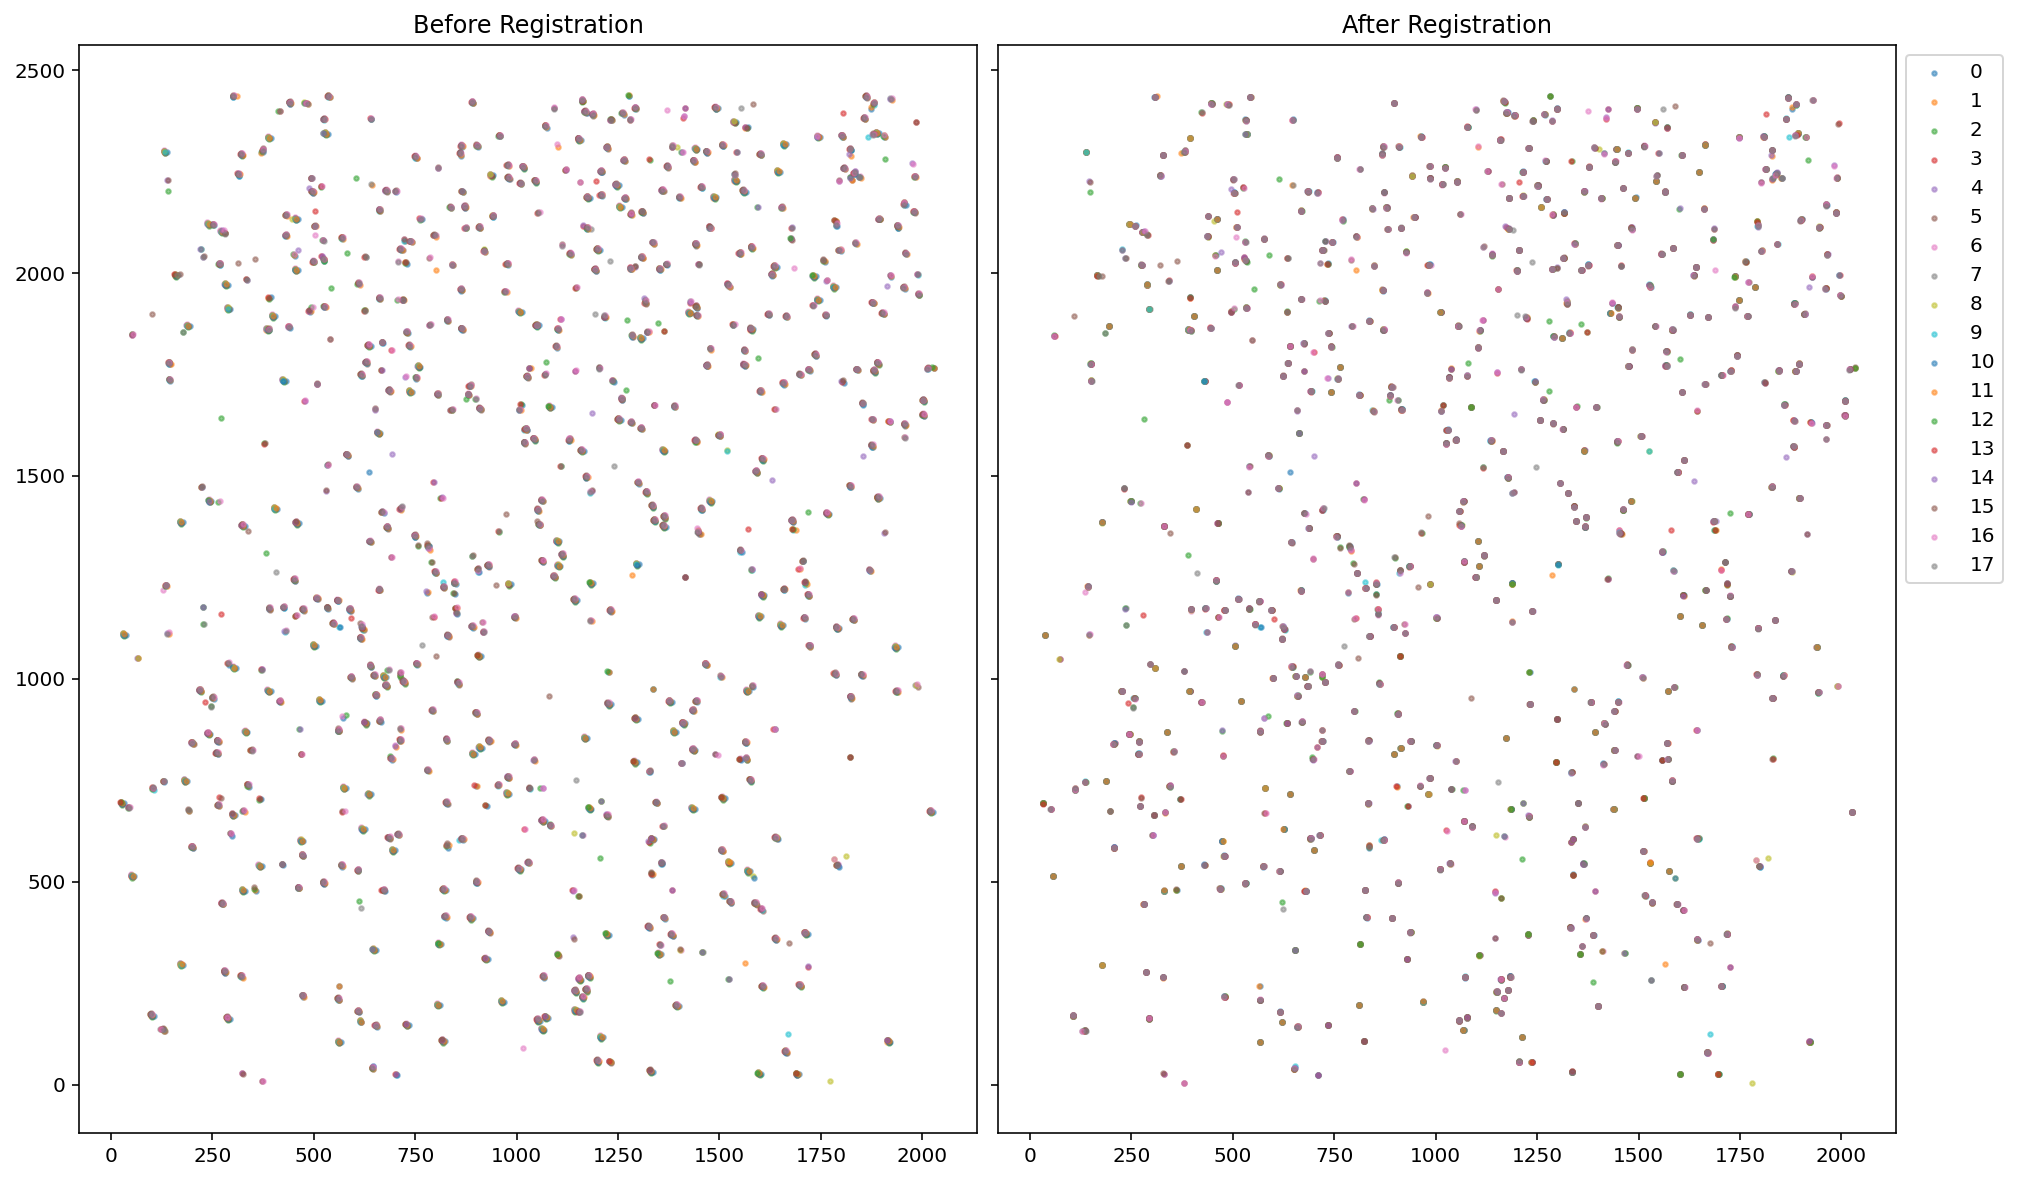

In [11]:
""" Without Registration """
fig, axs = plt.subplots(1, 2, figsize=(10*2,10), sharex=True, sharey=True)
ax = axs[0]
ax.set_title('Before Registration')
for key in all_beads.keys():
    beads = all_beads[key]
    ax.scatter(beads[:,0], beads[:,1], s=5, alpha=0.5, label=key)
ax.set_aspect('equal')

ax = axs[1]
ax.set_title('After Registration')
for key in all_regbeads.keys():
    beads = all_regbeads[key]
    ax.scatter(beads[:,0], beads[:,1], s=5, alpha=0.5, label=key)
ax.legend(bbox_to_anchor=(1,1))
ax.set_aspect('equal')

fig.subplots_adjust(wspace=-0.3)
plt.show()

# quantify offsets